# Introduction

As a starting point of almost all data science projects, you need to collect data, as much and relevant as possible.

You will be collecting data from various sources. After your raw data has been collected, you will need to improve the quality by performing data wrangling. 

Then you can start exploring the processed data.  We will be your guide as we explore some really interesting real-world datasets together. You'll get to practice your SQL skills as we query the data and gather insights.  

You'll gain further insights into the data by applying some basic statistical analysis and data visualization, you'll be able to see directly how variables might be related to each other.   

 We'll drill down into finer levels of detail by splitting the data into groups defined by categorical variables or factors in your data.  

You will be guided to build, evaluate, and refine predictive models for discovering more exciting insights. 

The final task of this capstone project is to create a presentation that will be developed into stories of all your analysis.

Thanks and good luck! 

SpaceX  Falcon 9 first stage Landing Prediction


In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 

# Objectives


In this lab, you will make a get request to the SpaceX API. You will also do some basic data wrangling and formating. 

- Request to the SpaceX API
- Clean the requested data




Import Libraries and Define Auxiliary Functions

We will import the following libraries into the lab


In [2]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

Below we will define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

From the <code>rocket</code> column we would like to learn the booster name.


In [3]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.


In [5]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.


In [7]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.


In [8]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Now let's start requesting rocket launch data from SpaceX API with the following URL:


spacex_url="https://api.spacexdata.com/v4/launches/past"

In [10]:
response = requests.get(spacex_url)

Check the content of the response


In [12]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

# Task 1: Request and parse the SpaceX launch data using the GET request


To make the requested JSON results more consistent, we will use the following static response object for this project:


static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

We should see that the request was successfull with the 200 status response code


response.status_code

Now we decode the response content as a Json using <code>.json()</code> and turn it into a Pandas dataframe using <code>.json_normalize()</code>


 Use json_normalize meethod to convert the json result into a dataframe


Using the dataframe <code>data</code> print the first 5 rows


Get the head of the dataframe


You will notice that a lot of the data are IDs. For example the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns <code>rocket</code>, <code>payloads</code>, <code>launchpad</code>, and <code>cores</code>.


In [ ]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

* From the <code>rocket</code> we would like to learn the booster name

* From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to

* From the <code>launchpad</code> we would like to know the name of the launch site being used, the longitude, and the latitude.

* **From <code>cores</code> we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.**

The data from these requests will be stored in lists and will be used to create a new dataframe.


In [16]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

These functions will apply the outputs globally to the above variables. Let's take a looks at <code>BoosterVersion</code> variable. Before we apply  <code>getBoosterVersion</code> the list is empty:


BoosterVersion

Now, let's apply <code> getBoosterVersion</code> function method to get the booster version


In [ ]:
# Call getBoosterVersion
getBoosterVersion(data)

the list has now been update 


In [ ]:
BoosterVersion[0:5]

we can apply the rest of the  functions here:


In [ ]:
# Call getLaunchSite
getLaunchSite(data)

In [ ]:
# Call getPayloadData
getPayloadData(data)

In [ ]:
# Call getCoreData
getCoreData(data)

Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.


In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


Then, we need to create a Pandas data frame from the dictionary launch_dict.


In [24]:
# Create a data from launch_dict


Show the summary of the dataframe


In [25]:
# Show the head of the dataframe

# Task 2: Filter the dataframe to only include `Falcon 9` launches


Finally we will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the <code>BoosterVersion</code> column to only keep the Falcon 9 launches. Save the filtered data to a new dataframe called <code>data_falcon9</code>.


In [26]:
# Hint data['BoosterVersion']!='Falcon 1'


Now that we have removed some values we should reset the FlgihtNumber column


In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

# Data Wrangling


We can see below that some of the rows are missing values in our dataset.


In [ ]:
data_falcon9.isnull().sum()

Before we can continue we must deal with these missing values. The <code>LandingPad</code> column will retain None values to represent when landing pads were not used.


### Task 3: Dealing with Missing Values


In [ ]:
Calculate below the mean for the <code>PayloadMass</code> using the <code>.mean()</code>. Then use the mean and the <code>.replace()</code> function to replace `np.nan` values in the data with the mean you calculated.


In [30]:
# Calculate the mean value of PayloadMass column

# Replace the np.nan values with its mean value

You should see the number of missing values of the <code>PayLoadMass</code> change to zero.
Now we should have no missing values in our dataset except for in <code>LandingPad</code>.
We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


In [ ]:
<code>data_falcon9.to_csv('dataset_part_1.csv', index=False)</code>


# **Space X  Falcon 9 First Stage Landing Prediction**


# Lab 2: Data wrangling 


In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models. 

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship. 

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.


## Objectives
Perform exploratory  Data Analysis and determine Training Labels 

- Exploratory Data Analysis
- Determine Training Labels 


# Import Libraries and Define Auxiliary Functions


We will import the following libraries.


In [31]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Data Analysis 


Load Space X dataset, from last section.


In [32]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute


In [33]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns are numerical and categorical:


In [34]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

# TASK 1: Calculate the number of launches on each site

The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites'>Cape Canaveral Space</a> Launch Complex 40  <b>VAFB SLC 4E </b> , Vandenberg Air Force Base Space Launch Complex 4E <b>(SLC-4E)</b>, Kennedy Space Center Launch Complex 39A <b>KSC LC 39A </b>.The location of each Launch Is placed in the column <code>LaunchSite</code>


Next, let's see the number of launches for each site.

Use the method  <code>value_counts()</code> on the column <code>LaunchSite</code> to determine the number of launches  on each site: 


# Apply value_counts() on column LaunchSite


Each launch aims to an dedicated orbit, and here are some common orbit types:




* <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit'>[1]</a>.

* <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges'>[2]</a>.


* <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html" >[3] </a>.


* <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit">[4] <a>.
    
    
    
* <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point#L1_point">[5]</a> .
    
    
* <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit">[6]</a>.


* <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station"> [7] </a>


* <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [8] </a>


* <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [9] </a>


* <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit"> [10] </a>


* <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit"> [11] </a>

some are shown in the following plot:


# TASK 2: Calculate the number and occurrence of each orbit


 Use the method  <code>.value_counts()</code> to determine the number and occurrence of each orbit in the  column <code>Orbit</code>


In [35]:
# Apply value_counts on Orbit column

In [ ]:
### TASK 3: Calculate the number and occurence of mission outcome of the orbits

Use the method <code>.value_counts()</code> on the column <code>Outcome</code> to determine the number of <code>landing_outcomes</code>.Then assign it to a variable landing_outcomes.

# landing_outcomes = values on Outcome column
<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.

for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)
We create a set of outcomes where the second stage did not land successfully:

bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

# TASK 4: Create a landing outcome label from Outcome column


Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


In [37]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully 


In [ ]:
df['Class']=landing_class
df[['Class']].head(8)

In [39]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


We can use the following line of code to determine  the success rate:


In [ ]:
df["Class"].mean()

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [ ]:
<code>df.to_csv("dataset_part_2.csv", index=False)</code>


# Introduction

Using this python notebook you will:
  1. Understand the spacex Dataset
  2. Load the dataset into the corresponding table in a Db2 database
  3. Execute SQL queries to answer assignment questions

## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [42]:
!pip install sqlalchemy==1.3.9


     ---------------------------------------- 0.0/6.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.0 MB 217.9 kB/s eta 0:00:28
     ---------------------------------------- 0.0/6.0 MB 262.6 kB/s eta 0:00:23
      --------------------------------------- 0.1/6.0 MB 581.0 kB/s eta 0:00:11
     - -------------------------------------- 0.2/6.0 MB 1.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.5/6.0 MB 2.2 MB/s eta 0:00:03
     ---- ----------------------------------- 0.7/6.0 MB 2.7 MB/s eta 0:00:02
     ------ --------------------------------- 0.9/6.0 MB 2.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.0/6.0 MB 2.9 MB/s eta 0:00:02
     ---------- ----------------------------- 1.6/6.0 MB 3.7 MB/s eta 0:00:02
     ----------- ---------------------------- 1.8/6.0 MB 3.9 MB/s eta 0:00:02
     ------------- -------------------------- 2.1/6.0 MB 4.1 MB/s eta 0:00:01
     --------------- ------------------------ 2.3/6.0 MB 4.2 MB/s

# Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [43]:
#Please uncomment and execute the code below if you are working locally.

#!pip install ipython-sql

In [ ]:
%load_ext sql

In [ ]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [ ]:
!pip install -q pandas==1.1.5

In [48]:
%sql sqlite:///my_data1.db

UsageError: Line magic function `%sql` not found.


In [49]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

# **Note:This below code is added to remove blank rows from table**


In [ ]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

# Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

 Task 1




##### Display the names of the unique launch sites  in the space mission


# Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


# Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


# Task 4




##### Display average payload mass carried by booster version F9 v1.1


# Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


# Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


# Task 7




##### List the total number of successful and failure mission outcomes


# Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


# Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


# Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


# **SpaceX  Falcon 9 First Stage Landing Prediction**


# Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


# Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [58]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [59]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


C:\Users\umana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


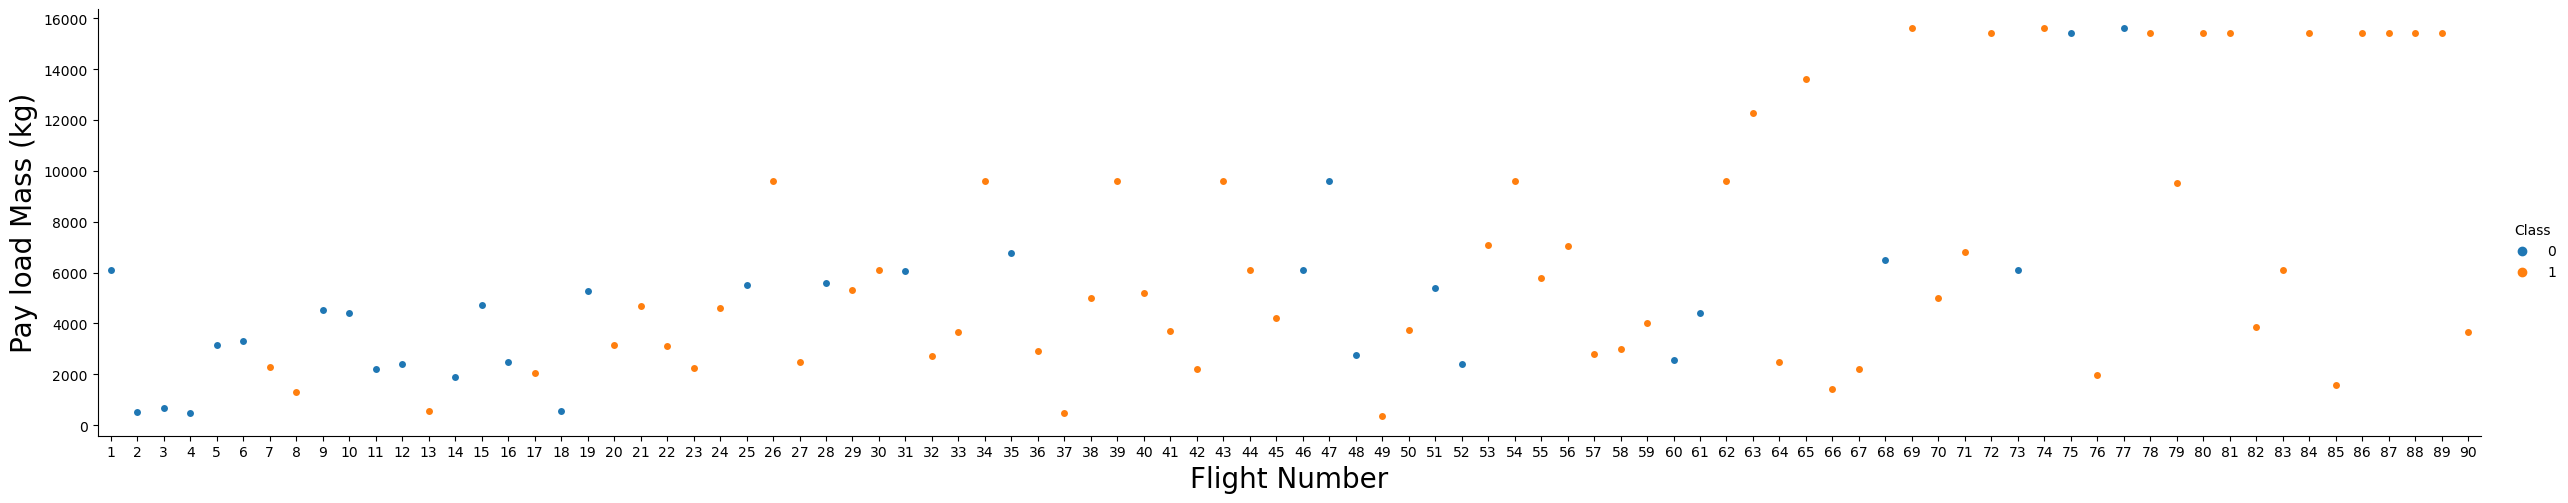

In [60]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


# TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


In [61]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


# TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


In [62]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


# TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


# HINT use groupby method on Orbit column and get the mean of Class column


Analyze the ploted bar chart try to find which orbits have high sucess rate.


## TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [64]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


## TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [65]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




# TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 



The function will help you get the year from the date:


In [66]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [67]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


# Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [68]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


# TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [69]:
# HINT: Use get_dummies() function on the categorical columns


# TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [70]:
# HINT: use astype function


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


# **Launch Sites Locations Analysis with Folium**


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


# Objectives


This lab contains the following tasks:
- **TASK 1:** Mark all launch sites on a map
- **TASK 2:** Mark the success/failed launches for each site on the map
- **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [ ]:
!pip3 install folium
!pip3 install wget

In [73]:
import folium
import wget
import pandas as pd

In [74]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site. 


In [76]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

100% [................................................................................] 7710 / 7710

Now, you can take a look at what are the coordinates for each site.


In [ ]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [78]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example, 


In [79]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle. 


Now, let's add a circle for each launch site in data frame `launch_sites`


_TODO:_  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


In [ ]:
`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


In [ ]:
`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [80]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label


The generated map with marked launch sites should look similar to the following:


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:
- Are all launch sites in proximity to the Equator line?
- Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [81]:
spacex_df.tail(10)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
46,43,2017-10-11,22:53:00,F9 FT B1031.2,KSC LC-39A,SES-11 / EchoStar 105,5200.00,GTO,SES EchoStar,Success (drone ship),1,28.573255,-80.646895
47,44,2017-10-30,19:34:00,F9 B4 B1042.1,KSC LC-39A,Koreasat 5A,3500.00,GTO,KT Corporation,Success (drone ship),1,28.573255,-80.646895
48,54,2018-05-11,20:14:00,F9 B5 B1046.1,KSC LC-39A,Bangabandhu-1,3600.00,GTO,Thales-Alenia/BTRC,Success (drone ship),1,28.573255,-80.646895
49,45,2017-12-15,15:36:00,F9 FT B1035.2,CCAFS SLC-40,SpaceX CRS-13,2205.00,LEO (ISS),NASA (CRS),Success (ground pad),1,28.563197,-80.576820
50,47,2018-01-08,1:00:00,F9 B4 B1043.1,CCAFS SLC-40,Zuma,3696.65,LEO,Northrop Grumman,Success (ground pad),1,28.563197,-80.576820
51,48,2018-01-31,21:25:00,F9 FT B1032.2,CCAFS SLC-40,GovSat-1 / SES-16,4230.00,GTO,SES,Controlled (ocean),0,28.563197,-80.576820
52,50,2018-03-06,5:33:00,F9 B4 B1044,CCAFS SLC-40,Hispasat 30W-6 PODSat,6092.00,GTO,Hispasat NovaWurks,No attempt,0,28.563197,-80.576820
53,52,2018-04-02,20:30:00,F9 B4 B1039.2,CCAFS SLC-40,SpaceX CRS-14,2647.00,LEO (ISS),NASA (CRS),No attempt,0,28.563197,-80.576820
54,53,2018-04-18,22:51:00,F9 B4 B1045.1,CCAFS SLC-40,Transiting Exoplanet Survey Satellite (TESS),362.00,HEO,NASA (LSP),Success (drone ship),1,28.563197,-80.576820
55,56,2018-06-04,4:45:00,F9 B4 B1040.2,CCAFS SLC-40,SES-12,5384.00,GTO,SES,No attempt,0,28.563197,-80.576820


Next, let's create markers for all launch records. 
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [82]:
marker_cluster = MarkerCluster()


_TODO:_ Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [83]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red


In [84]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long,marker_color
46,43,2017-10-11,22:53:00,F9 FT B1031.2,KSC LC-39A,SES-11 / EchoStar 105,5200.00,GTO,SES EchoStar,Success (drone ship),1,28.573255,-80.646895,green
47,44,2017-10-30,19:34:00,F9 B4 B1042.1,KSC LC-39A,Koreasat 5A,3500.00,GTO,KT Corporation,Success (drone ship),1,28.573255,-80.646895,green
48,54,2018-05-11,20:14:00,F9 B5 B1046.1,KSC LC-39A,Bangabandhu-1,3600.00,GTO,Thales-Alenia/BTRC,Success (drone ship),1,28.573255,-80.646895,green
49,45,2017-12-15,15:36:00,F9 FT B1035.2,CCAFS SLC-40,SpaceX CRS-13,2205.00,LEO (ISS),NASA (CRS),Success (ground pad),1,28.563197,-80.576820,green
50,47,2018-01-08,1:00:00,F9 B4 B1043.1,CCAFS SLC-40,Zuma,3696.65,LEO,Northrop Grumman,Success (ground pad),1,28.563197,-80.576820,green
51,48,2018-01-31,21:25:00,F9 FT B1032.2,CCAFS SLC-40,GovSat-1 / SES-16,4230.00,GTO,SES,Controlled (ocean),0,28.563197,-80.576820,red
52,50,2018-03-06,5:33:00,F9 B4 B1044,CCAFS SLC-40,Hispasat 30W-6 PODSat,6092.00,GTO,Hispasat NovaWurks,No attempt,0,28.563197,-80.576820,red
53,52,2018-04-02,20:30:00,F9 B4 B1039.2,CCAFS SLC-40,SpaceX CRS-14,2647.00,LEO (ISS),NASA (CRS),No attempt,0,28.563197,-80.576820,red
54,53,2018-04-18,22:51:00,F9 B4 B1045.1,CCAFS SLC-40,Transiting Exoplanet Survey Satellite (TESS),362.00,HEO,NASA (LSP),Success (drone ship),1,28.563197,-80.576820,green
55,56,2018-06-04,4:45:00,F9 B4 B1040.2,CCAFS SLC-40,SES-12,5384.00,GTO,SES,No attempt,0,28.563197,-80.576820,red


_TODO:_ For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [85]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [86]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


In [87]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

_TODO:_ Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [88]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

_TODO:_ After obtained its coordinate, create a `folium.Marker` to show the distance


In [89]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

_TODO:_ Draw a `PolyLine` between a launch site to the selected coastline point


In [ ]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

_TODO:_ Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


In [91]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site


After you plot distance lines to the proximities, you can answer the following questions easily:
- Are launch sites in close proximity to railways?
- Are launch sites in close proximity to highways?
- Are launch sites in close proximity to coastline?
- Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


# Build a Dashboard Application with Plotly Dash
In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in
real-time.

This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:

TASK 1: Add a Launch Site Drop-down Input Component
TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
TASK 3: Add a Range Slider to Select Payload
TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
Note:Please take screenshots of the Dashboard and save them. Further upload your notebook to github.

The github url and the screenshots are later required in the presentation slides.

Your completed dashboard application should look like the following screenshot:

After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:

Which site has the largest successful launches?
Which site has the highest launch success rate?
Which payload range(s) has the highest launch success rate?
Which payload range(s) has the lowest launch success rate?
Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest
launch success rate?
Estimated time needed: 90 minutes

Important Notice about this lab environment

Please be aware that sessions for this lab environment are not persisted. When you launch the Cloud IDE, you are presented with a ‘dedicated computer on the cloud’ exclusively for you. This is available to you as long as you are actively working on the labs.
Once you close your session or it is timed out due to inactivity,
you are logged off, and this dedicated computer on the cloud is deleted along with any files you may have created, downloaded or installed.

The next time you launch this lab, a new environment is created for you.
If you finish only part of the lab and return later, you may have to start from the beginning. So, it is a good idea to plan your time accordingly and finish your labs in a single session.

Setup development environment
Install required Python packages
Open a new terminal, by clicking on the menu bar and selecting Terminal->New Terminal, as in the image below.

In [ ]:
python3.11 -m pip install pandas dash

Download a skeleton dashboard application and dataset
First, let’s get the SpaceX Launch dataset for this lab:

Run the following wget command line in the terminal to download dataset as spacex_launch_dash.csv
1
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
Copied!
Download a skeleton Dash app to be completed in this lab:
1
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"
Copied!
Test the skeleton app by running the following command in the terminal:
1
python3.11 spacex_dash_app.py
Copied!
Observe the port number (8050) shown in the terminal.

In the left Navigation Pane click on Others and click Launch Application option under it.Enter the application port number as 8050.
Click Your Application.


You should see a nearly blank web page indicating a successfully running dash app.
Next, let’s fill the skeleton app with required input/output components and callback functions.
If you need to refresh your memory about Plotly Dash components and callback functions,
you may refer to the lab you have learned before:

Plotly Dash Lab

TASK 1: Add a Launch Site Drop-down Input Component
We have four different launch sites and we would like to first see which one has the largest success count. Then,
we would like to select one specific site and check its detailed success rate (class=0 vs. class=1).

As such, we will need a dropdown menu to let us select different launch sites.

Find and complete a commented dcc.Dropdown(id='site-dropdown',...) input with following attributes:
id attribute with value site-dropdown
options attribute is a list of dict-like option objects (with label and value attributes). You can set
the label and value all to be the launch site names in the spacex_df
and you need to include the default All option. e.g.,

In [ ]:
1
  options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]
Copied!
value attribute with default dropdown value to be ALL meaning all sites are selected
placeholder attribute to show a text description about this input area,
such as Select a Launch Site here
searchable attribute to be True so we can enter keywords to search launch sites
Here is an example of dcc.Dropdown:

1
2
3
4
5
6
7
8
9
  dcc.Dropdown(id='id',
                options=[
                    {'label': 'All Sites', 'value': 'ALL'},
                    {'label': 'site1', 'value': 'site1'},
                ],
                value='ALL',
                placeholder="place holder here",
                searchable=True
                ),
Copied!
If you need more help about Dropdown(), refer to the Plotly Dash Reference section towards
the end of this lab.

Your completed dropdown menu should look like the following screenshot:

TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
The general idea of this callback function is to get the selected launch site from site-dropdown and render
a pie chart visualizing launch success counts.

Dash callback function is a type of Python function which will be automatically called by
Dash whenever receiving an input component updates, such as a click or dropdown selecting event.

If you need to refresh your memory about Plotly Dash callback functions,
you may refer to the lab you have learned before:

Plotly Dash Lab

Let’s add a callback function in spacex_dash_app.py including the following application logic:

Input is set to be the site-dropdown dropdown, i.e., Input(component_id='site-dropdown', component_property='value')

In [ ]:
A If-Else statement to check if ALL sites were selected or just a specific launch site was selected
If ALL sites are selected, we will use all rows in the dataframe spacex_df to render and return a pie chart graph to show the total success launches (i.e., the total count of class column)
If a specific launch site is selected, you need to filter the dataframe spacex_df first in order
to include the only data for the selected site.
Then, render and return a pie chart graph to show the success (class=1) count and failed (class=0) count for the selected site.
Here is an example of a callback function:

1
2
3
4
5
6
7
8
9
10
11
12
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(data, values='class', 
        names='pie chart names', 
        title='title')
        return fig
    else:
        # return the outcomes piechart for a selected site
Copied!
The rendered pie chart should look like the following screenshots:

Pie chart for all sites are selected


In [ ]:
TASK 3: Add a Range Slider to Select Payload
Next, we want to find if variable payload is correlated to mission outcome. From a dashboard point of view, we
want to be able to easily select different payload range and see if we can identify some visual patterns.

Find and complete a commented dcc.RangeSlider(id='payload-slider',...) input with the following attribute:

id to be payload-slider
min indicating the slider starting point, we set its value to be 0 (Kg)
max indicating the slider ending point to, we set its value to be 10000 (Kg)
step indicating the slider interval on the slider, we set its value to be 1000 (Kg)
value indicating the current selected range, we could set it to be min_payload and max_payload
Here is an example of RangeSlider:

1
2
3
4
5
dcc.RangeSlider(id='id',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[min_value, max_value])
Copied!
You completed payload range slider should be similar the following screenshot

In [ ]:
TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
Next, we want to plot a scatter plot with the x axis to be the payload and the y axis to be the launch outcome (i.e., class column).
As such, we can visually observe how payload may be correlated with mission outcomes for selected site(s).

In addition, we want to color-label the Booster version on each scatter point so that we may
observe mission outcomes with different boosters.

Now, let’s add a call function including the following application logic:

Input to be [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")]
Note that we have two input components, one to receive selected launch site and another to receive selected payload range
Output to be Output(component_id='success-payload-scatter-chart', component_property='figure')
A If-Else statement to check if ALL sites were selected or just a specific launch site was selected
If ALL sites are selected, render a scatter plot to display all values for variable Payload Mass (kg) and variable class.
In addition, the point color needs to be set to the booster version i.e., color="Booster Version Category"
If a specific launch site is selected, you need to filter the spacex_df first, and render a scatter chart to show
values Payload Mass (kg) and class for the selected site, and color-label the point using Boosster Version Category likewise.
You rendered scatter point should look like the following screenshot:


If you need more reference about dash callbacks and plotly scatter plots, refer to the Plotly Dash Reference towards
the end of this lab.

Finding Insights Visually
Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:

Which site has the largest successful launches?
Which site has the highest launch success rate?
Which payload range(s) has the highest launch success rate?
Which payload range(s) has the lowest launch success rate?
Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest
launch success rate?
Plotly Dash Reference
Dropdown (input) component
Refer here for more details about dcc.Dropdown()

Range slider (input) component
Refer here for more details about dcc.RangeSlider()

Pie chart (output) component
Refer here for more details about plotly pie charts

Scatter chart (output) component
Refer here for more details about plotly scatter charts

Author
Yan Luo

Other contributor(s)
Joseph Santarcangelo

Changelog
Date	Version	Changed by	Change Description
20-09-2022	1.3	Lakshmi Holla	Updated screenshot.
29-08-2022	1.2	Lakshmi Holla	Updated screenshot.
03-09-2021	1.1	Lakshmi Holla	Added a note.
06-01-2021	1.0	Yan	Initial version created
© IBM Corporation 2021. All rights reserved.


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


# Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [ ]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [ ]:
data.head()

In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [ ]:
X.head(100)

# TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


# TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


# TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


we can see we only have 18 test samples.


In [ ]:
Y_test.shape

# TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Lets look at the confusion matrix:


In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

# TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


We can plot the confusion matrix


In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:
